# Lab2
##  Pichu eller Pikachu? 

### Läs in data från fil

In [75]:
# Funktion som tar sökvägen till en textfil med pokemondata som argument.
# Läser in datan och returnerar en lista med datapunkter. Varje datapunkt är också en lista med två värden.

def poke_lasin(poke_path):
    with open(poke_path,'r') as f: # Läser in filen och tilldelar innehållet till raa_data
        raa_data = f.readlines()

    rensad_data = [] # Initera tom lista

    for rad in raa_data[1:]: # [0] inhåller överskrifter som vi inte vill ha med
        
        rad = rad.split(sep=", ") # Dela upp strängen per ", "
        rensad_data.append([float(rad[0][1:]), float(rad[1][:-2])]) # Rensa bort onödiga tecken och typomvandla till flyttal. Lägg till i rensad_data.        

    return(rensad_data)


In [76]:
# Test av poke_lasin
# Endast för att kontrollera om fungerar som tänkt och läse in filen korrekt. Används inte i programmet

path_pichu = "files/pichu.txt"

d = poke_lasin(path_pichu)

# print(d) # Skriv ut data. Avstängd för det blir så mycket text

print(len(d)) # Skriv ut längden (antalet datapunkter) på d. 50 i givna filer.

# Jämför första och sista datapunkt mot värden i filen
print(d[0][0] == 20.11541438766307)
print(d[0][1] == 28.701809671168824)
print(d[-1][0] == 17.918657431760675)
print(d[-1][1] == 33.60779702234498)


50
True
True
True
True


In [110]:
# Visa en avatar för vald pokemon
# För att det är kul
# Bygger på den här sidan https://stackoverflow.com/questions/35286540/display-an-image-with-python

def visa_avatar(pokemon):
    import matplotlib.pyplot as plt
    
    pokemons = {"Pichu":"files/Pichu.png", "Pikachu" : "files/Pikachu.png"} # Dictionary med namn på pokemon och sökväg till bild. Kanske overkill för två men funktionen skulle gå att utöka för alla pokemons.

    path = pokemons[pokemon]    # välj sökväg för vald pokemon

    plt.figure(figsize=(5,5))   # Sätt storlek på figuren
    plt.axis("off")             # Stäng av axlarna i figuren
    plt.title(pokemon)
    bild = plt.imread(path)     # Läs in och tillela bilden till bild
    plt.imshow(bild)            # Lägg till bild i figur

    plt.show() # Gör figuren synlig

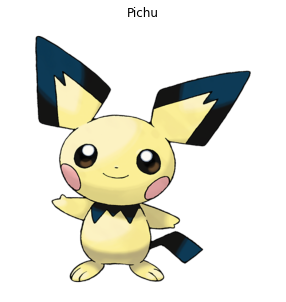

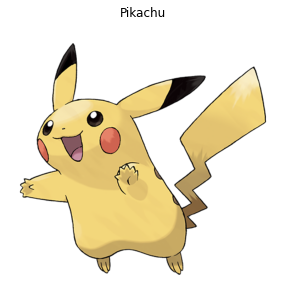

In [111]:
# Main eller vad det kallas i Python :)

path_pichu = "files/pichu.txt"
path_pikachu = "files/pikachu.txt"
path_test = "files/test_points.txt"

#apa = poke_lasin(path_pichu)
visa_avatar("Pichu")
visa_avatar("Pikachu")